In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
df = pd.read_csv('Glassdoor_ds_jobs_France_cleaned.csv')

In [42]:
df

,Job Title,Job Description,Rating,Company Name,Location,Size,Founded,Type of ownership,Industry,Sector,...,Age,Python,R,SQL,Machine Learning,Big Data,Statistique,Math,Master,AWS
0,DATA ANALYST / SCIENTIST (H/F) / Freelance,En binôme avec un développeur Java EE : - Part...,-1.0,FRISBEE PROFILING,Saint-Maur,De 1 à 50 employés,2016,Entreprise non cotée en bourse,Services informatiques,Informatique,...,6,0,0,0,0,0,1,0,0,0
1,Data Scientist H/F,"nöus\numlaut, part of Accenture, est un parten...",3.7,umlaut\n,Blagnac,De 1 001 à 5 000 employés,1996,Entreprise non cotée en bourse,Conseils,Services aux entreprises,...,26,0,0,0,0,1,0,0,0,0
2,Data Scientist (H/F),Date Limite Candidature : lundi 14 mars 2022\n...,3.8,CNRS\n,Vannes,Plus de 10 000 employés,1939,Enseignement supérieur/universitaire,Organismes fédéraux,Gouvernement,...,83,0,1,0,1,0,0,0,0,0
3,Data Scientist H/F,Informations générales\n\nLa Direction Général...,3.7,Dassault Aviation\n,Saint-Cloud,Plus de 10 000 employés,1929,Entreprise cotée en bourse,-1,-1,...,93,1,1,0,0,1,0,0,0,0
4,DATA SCIENTIST CYBERSECURITE H/F,Contrat : CDI\nRémunération : Selon profil\nLi...,2.7,ITrust\n,Toulouse,De 1 à 50 employés,2007,Entreprise non cotée en bourse,Services informatiques,Informatique,...,15,0,1,0,1,0,0,0,0,0
5,"Data Scientist (full time, all seniority level...",Who You'll Work With\nBased in Paris and worki...,4.4,McKinsey & Company\n,Paris,Plus de 10 000 employés,1926,Entreprise non cotée en bourse,Conseils,Services aux entreprises,...,96,0,0,0,1,0,0,1,0,0
6,Data Scientist (F ou H),Les équipes Transilien de SNCF offrent un serv...,3.5,SNCF\n,Saint-Denis,Plus de 10 000 employés,1938,Entreprise cotée en bourse,-1,-1,...,84,0,1,0,0,1,0,0,0,0
7,Data Scientist (H/F),Syngenta figure parmi les leaders mondiaux pou...,4.2,Syngenta\n,Guyancourt,Plus de 10 000 employés,2000,Entreprise non cotée en bourse,Production alimentaire,Agriculture et sylviculture,...,22,0,1,0,0,0,0,0,0,0
8,Audio data scientist,Vous aimez les nouvelles technologies et les t...,4.5,Wavely SAS\n,Villeneuve-d'Ascq,De 1 à 50 employés,2016,Entreprise non cotée en bourse,Solutions logicielles et réseau d''entreprise,Informatique,...,6,0,0,0,1,0,0,0,0,0
9,Data Scientist,Gather and analyze customer needs to propose s...,3.7,umlaut AG\n,Toulouse,De 1 001 à 5 000 employés,1996,Entreprise non cotée en bourse,Conseils,Services aux entreprises,...,26,0,0,0,1,0,1,1,1,0


In [43]:
df.columns

Index(['Job Title', 'Job Description', 'Rating', 'Company Name', 'Location',
       'Size', 'Founded', 'Type of ownership', 'Industry', 'Sector', 'Revenue',
       'hourly', 'Employer Provided', 'min salary', 'max salary', 'avg salary',
       'State', 'Age', 'Python', 'R', 'SQL', 'Machine Learning', 'Big Data',
       'Statistique', 'Math', 'Master', 'AWS'],
      dtype='object')

In [46]:
pd.set_option('display.max_rows', None)
df['Job Title'].value_counts()

Data Scientist H/F                                                                  11
Data Scientist (F/H)                                                                 5
Data Analyst                                                                         5
Data Scientist F/H                                                                   5
Data Scientist (H/F)                                                                 4
Data Scientist - FRANFINANCE-(H/F)                                                   4
Data Scientist                                                                       4
DATA SCIENTIST CYBERSECURITE H/F                                                     4
Senior Data Scientist                                                                4
Data Analyst (H/F)                                                                   3
Analyste données Énergie F/H                                                         3
Data analyste                              

In [47]:
def Job_simp(title):
    if 'data scientist' in title.lower() or 'data science' in title.lower():
        return 'Data Scientist'
    elif 'data analyst' in title.lower() or 'analyste' in title.lower():
        return 'Data Analyst'
    
def seniority(title):
    if 'senior' in title.lower() or 'expérimenté' in title.lower():
        return 'Senior'
    elif 'junior' in title.lower() or 'débutant' in title.lower():
        return 'Junior'
    else:
        return 'Intermediate'
    
def Type_position(title):
    if 'manager' in title.lower():
        return 'Manager'
    elif 'research' in title.lower() or 'chercheur' in title.lower():
        return 'Researcher'
    else:
        return 'Engineer'
    

In [48]:
df['Job_sim'] = df['Job Title'].apply(Job_simp)
df['Job_sim'].value_counts()

Data Scientist    87
Data Analyst      36
Name: Job_sim, dtype: int64

In [49]:
df['Seniority'] = df['Job Title'].apply(seniority)
df['Seniority'].value_counts()

Intermediate    113
Senior            7
Junior            3
Name: Seniority, dtype: int64

In [50]:
df['Type_position'] = df['Job Title'].apply(Type_position)
df['Type_position'].value_counts()

Engineer    122
Manager       1
Name: Type_position, dtype: int64

In [51]:
df['Freelance'] = df['Job Title'].apply(lambda x: 1 if 'freelance' in x.lower() else 0)
df['Freelance'].value_counts()

0    115
1      8
Name: Freelance, dtype: int64

In [52]:
df['Desc len'] = df['Job Description'].apply(lambda x: len(x))

In [35]:
df['Desc len']

0      1049
1       809
2       163
3       147
4       797
5       559
6       728
7       704
8      1531
9       914
10      611
11      676
12     1162
13     1342
14      181
15     1567
16      612
17      780
18     2386
19      737
20     1870
21      979
22      768
23     1281
24     1328
25      682
26     1873
27      412
28      810
29      561
30      869
31      869
32      869
33     1056
34     1032
35      696
36      719
37      729
38     1155
39      790
40       78
41      572
42      928
43      799
44     1281
45      614
46      617
47      577
48      714
49     1381
50      178
51      133
52      464
53      155
54     1277
55      652
56      758
57      456
58     1084
59      146
60      869
61      869
62      869
63      754
64      869
65      869
66     1056
67      811
68      150
69     3226
70      696
71     1505
72      719
73      928
74       78
75      991
76      538
77     1185
78     1547
79     2071
80     1139
81     1562
82      758
83  

<AxesSubplot:>

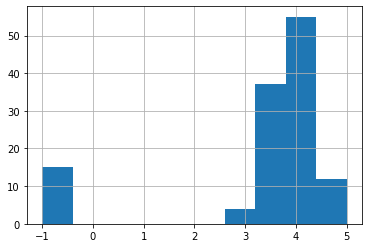

In [53]:
df['Rating'].hist()

In [54]:
df.columns

Index(['Job Title', 'Job Description', 'Rating', 'Company Name', 'Location',
       'Size', 'Founded', 'Type of ownership', 'Industry', 'Sector', 'Revenue',
       'hourly', 'Employer Provided', 'min salary', 'max salary', 'avg salary',
       'State', 'Age', 'Python', 'R', 'SQL', 'Machine Learning', 'Big Data',
       'Statistique', 'Math', 'Master', 'AWS', 'Job_sim', 'Seniority',
       'Type_position', 'Freelance', 'Desc len'],
      dtype='object')

<AxesSubplot:>

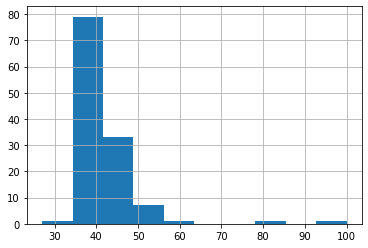

In [56]:
df['avg salary'].hist()

In [72]:
df[['Rating','Size', 'avg salary', 'Age', 'Desc len']].corr()

,Rating,avg salary,Age,Desc len
Rating,1.000000,-0.126430,0.284352,0.014936
avg salary,-0.126430,1.000000,-0.007629,-0.075176
Age,0.284352,-0.007629,1.000000,-0.017582
Desc len,0.014936,-0.075176,-0.017582,1.000000


<AxesSubplot:>

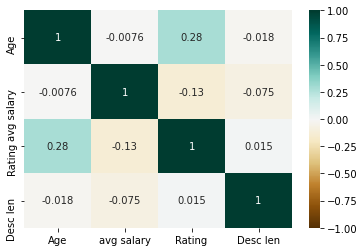

In [70]:
sns.heatmap(df[['Age', 'avg salary', 'Rating', 'Desc len']].corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')

In [63]:
df.columns

Index(['Job Title', 'Job Description', 'Rating', 'Company Name', 'Location',
       'Size', 'Founded', 'Type of ownership', 'Industry', 'Sector', 'Revenue',
       'hourly', 'Employer Provided', 'min salary', 'max salary', 'avg salary',
       'State', 'Age', 'Python', 'R', 'SQL', 'Machine Learning', 'Big Data',
       'Statistique', 'Math', 'Master', 'AWS', 'Job_sim', 'Seniority',
       'Type_position', 'Freelance', 'Desc len'],
      dtype='object')

In [76]:
df[['avg salary', 'Desc len']].corr()

,avg salary,Desc len
avg salary,1.000000,-0.075176
Desc len,-0.075176,1.000000


In [83]:
df_cat = df[['Location', 'Company Name', 'Founded', 'Type of ownership', 'Industry', 'Sector', 'Revenue', 
            'hourly', 'Employer Provided', 'Python', 'R', 'SQL', 'Machine Learning', 'Big Data',
       'Statistique', 'Math', 'Master', 'AWS', 'Seniority',
       'Type_position', 'Freelance', 'avg salary']]

<AxesSubplot:>

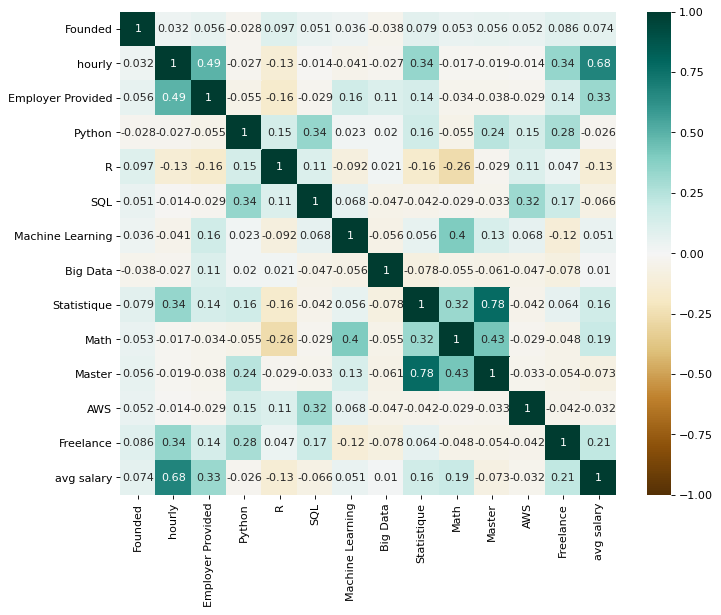

In [85]:
from matplotlib.pyplot import figure
figure(figsize=(10, 8), dpi=80)
sns.heatmap(df_cat.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')

Graph for Location: Total = 37


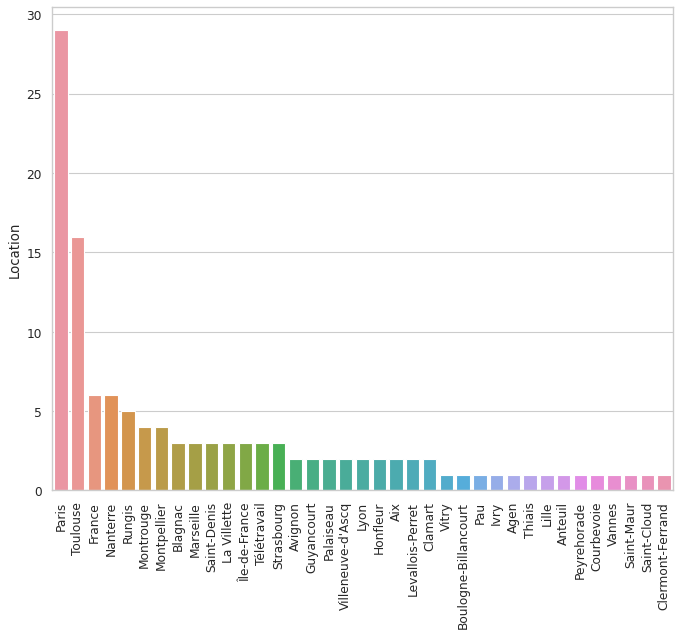

Graph for Company Name: Total = 72


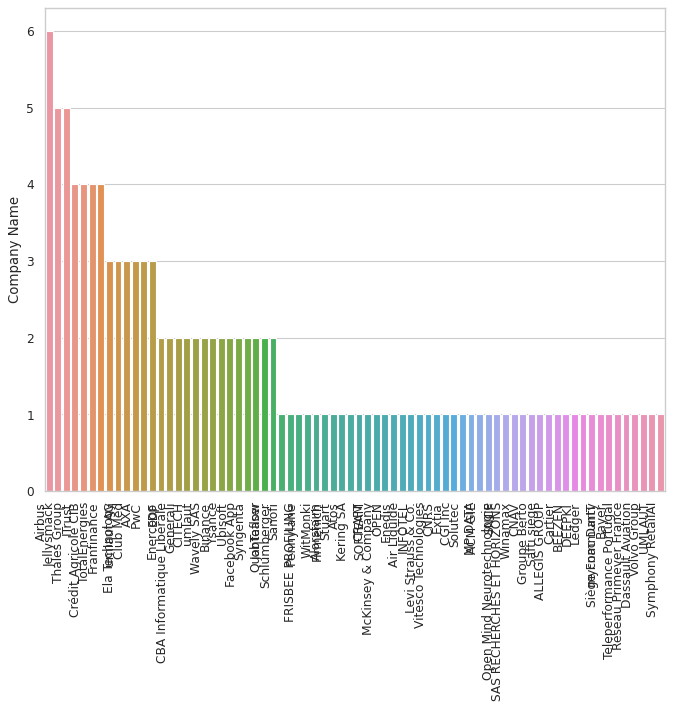

Graph for Founded: Total = 47


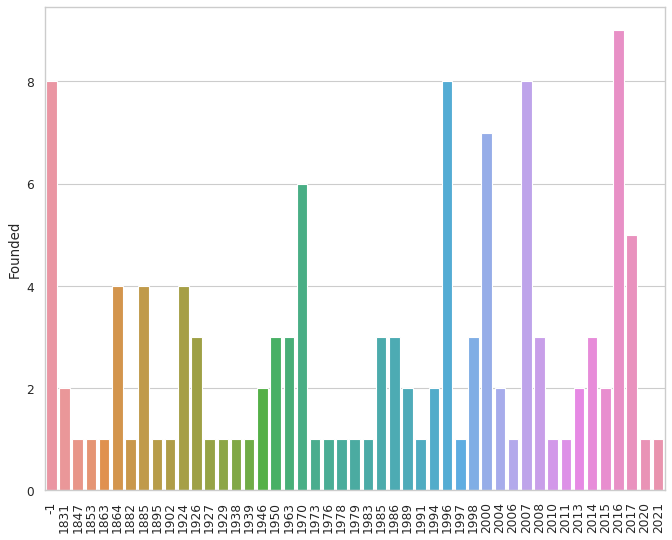

Graph for Type of ownership: Total = 9


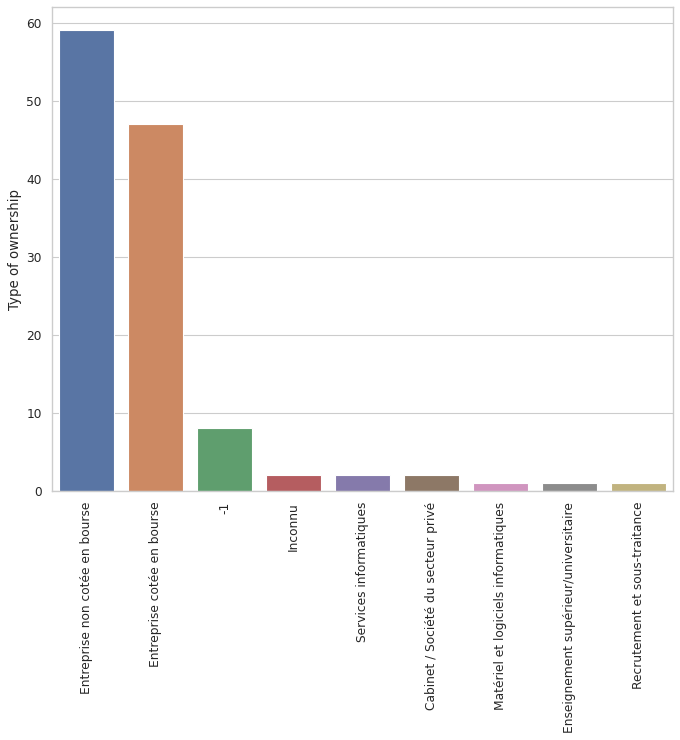

Graph for Industry: Total = 29


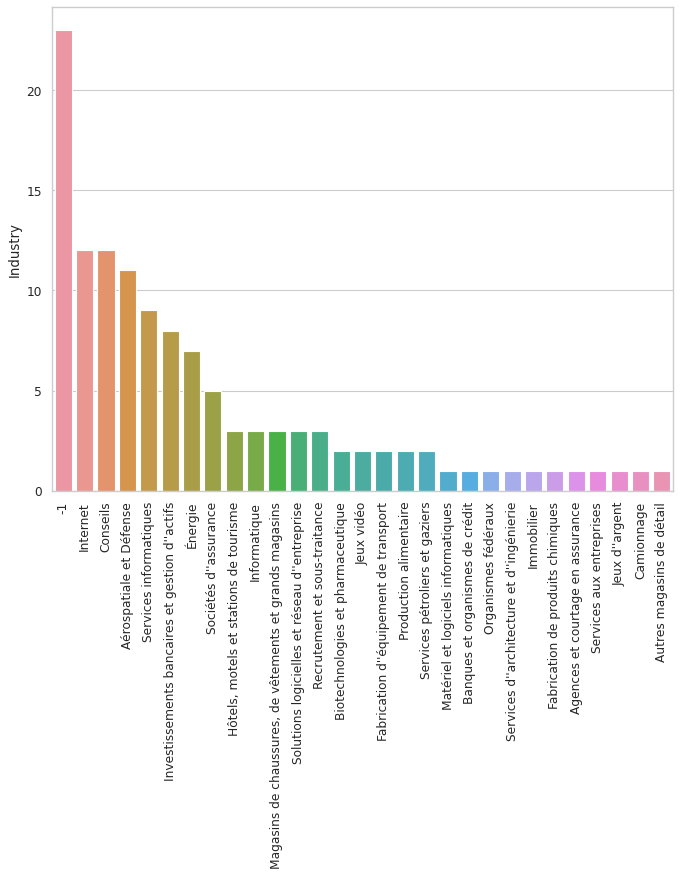

Graph for Sector: Total = 20


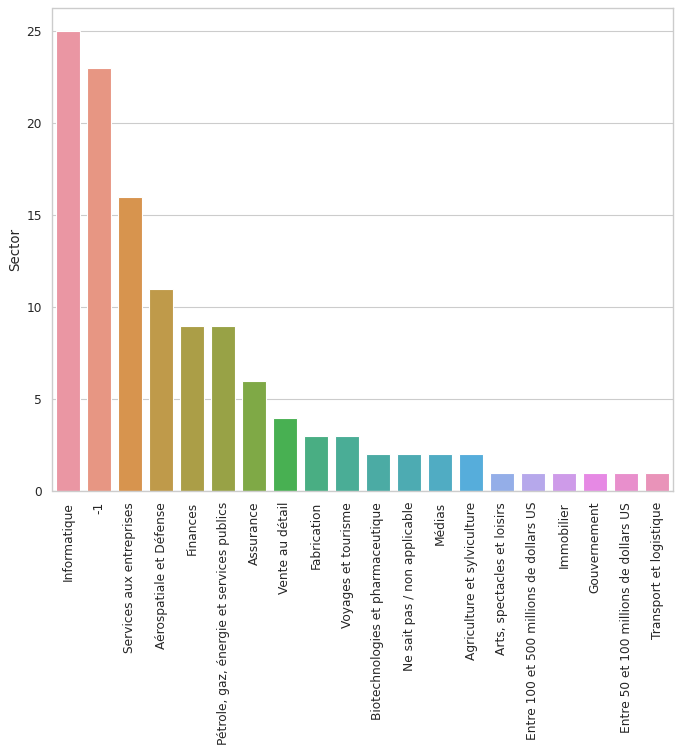

Graph for Revenue: Total = 13


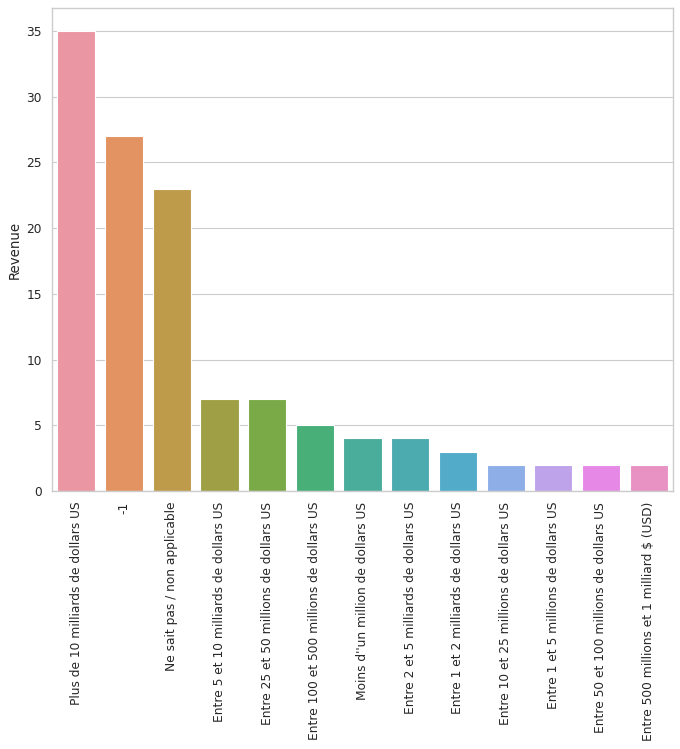

Graph for hourly: Total = 2


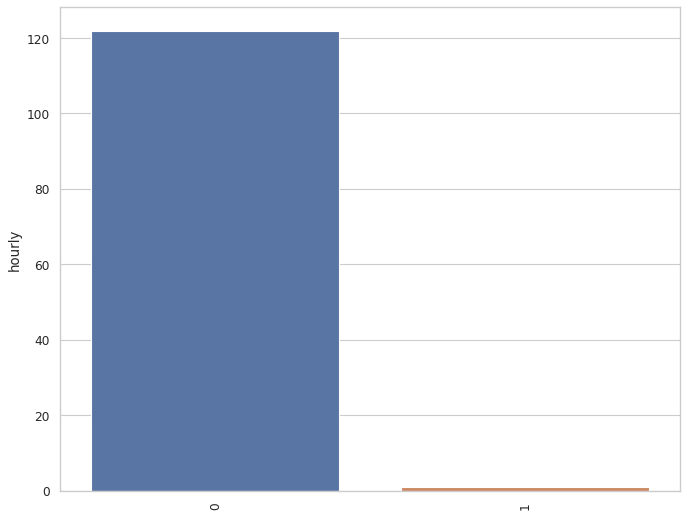

Graph for Employer Provided: Total = 2


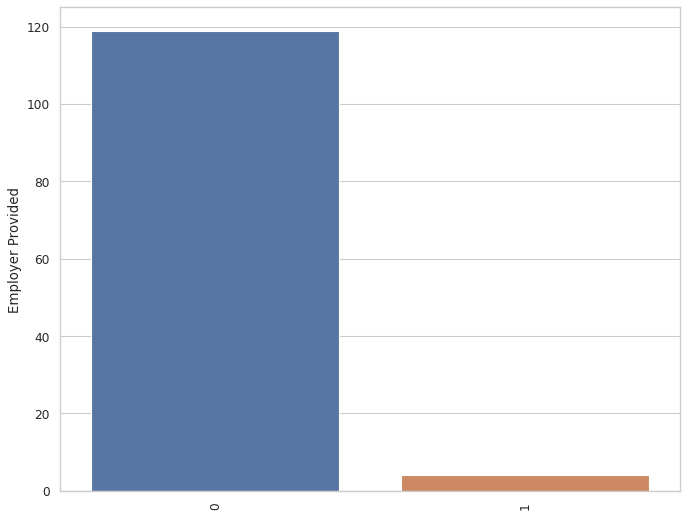

Graph for Python: Total = 2


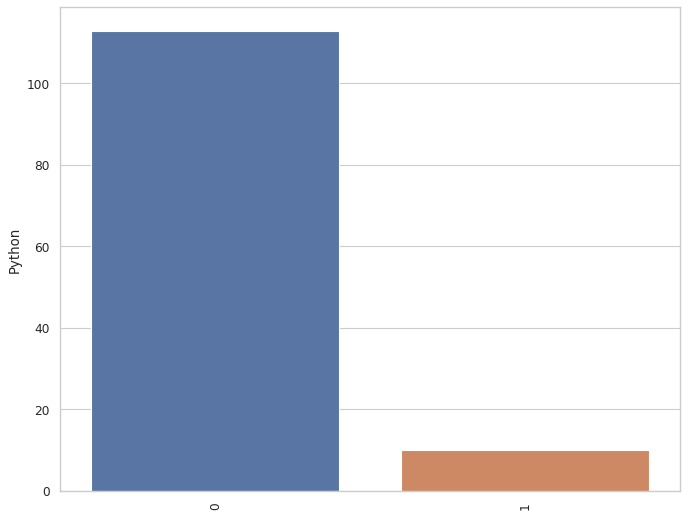

Graph for R: Total = 2


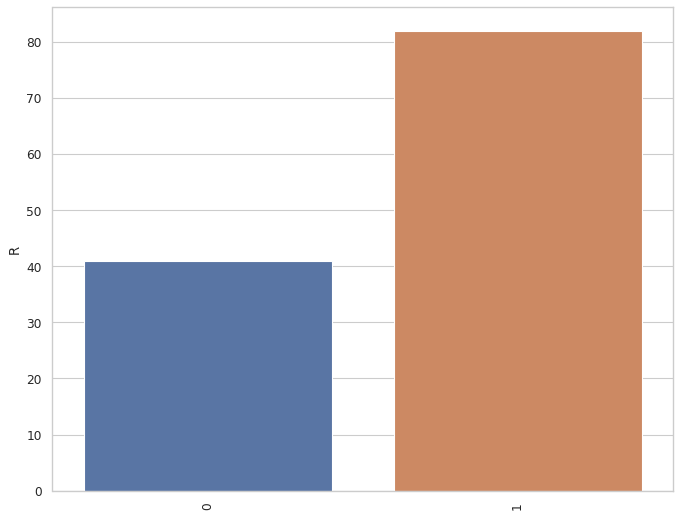

Graph for SQL: Total = 2


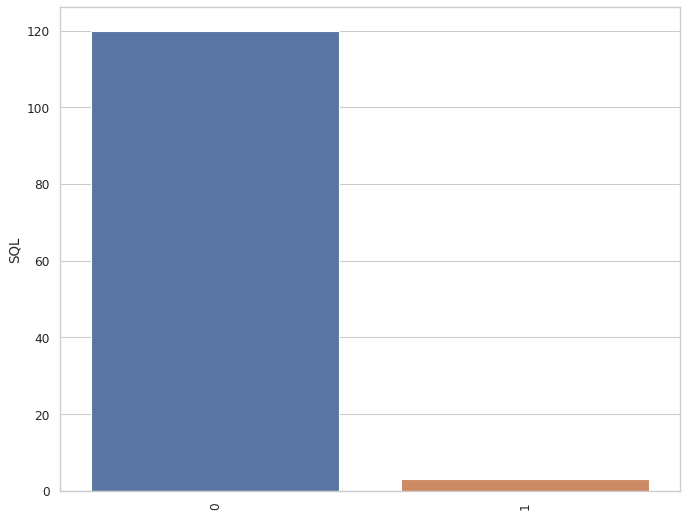

Graph for Machine Learning: Total = 2


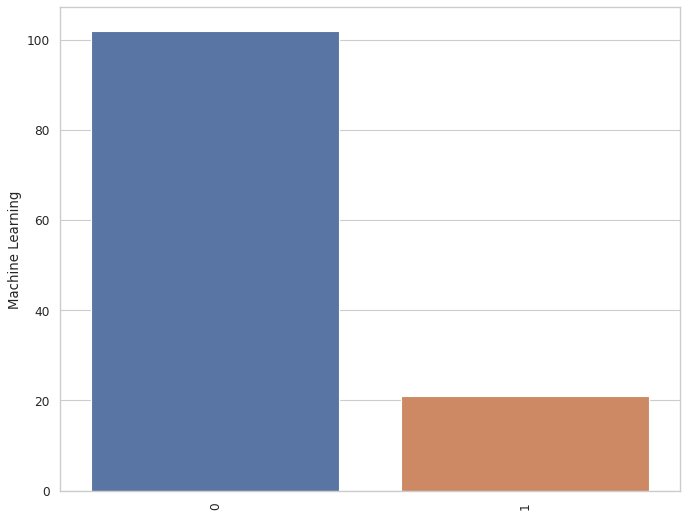

Graph for Big Data: Total = 2


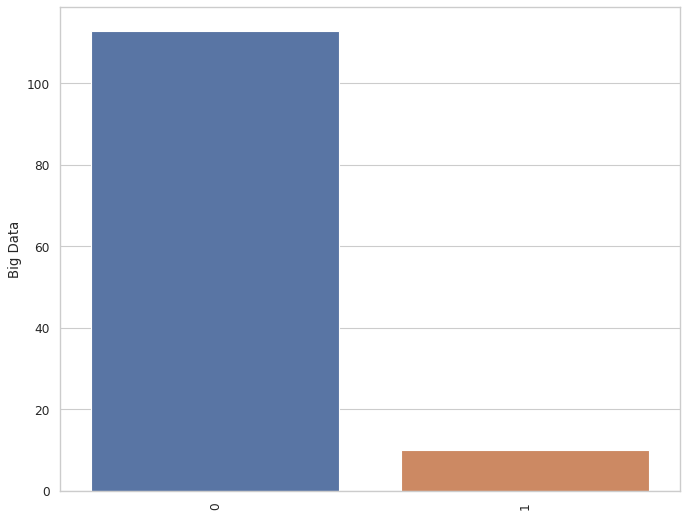

Graph for Statistique: Total = 2


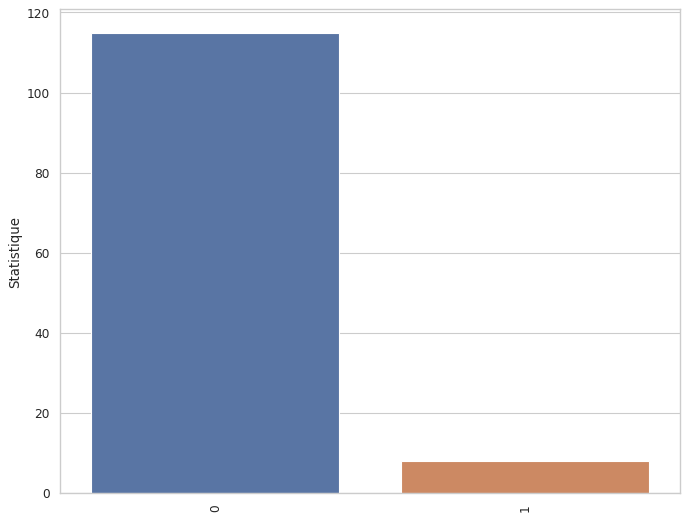

Graph for Math: Total = 2


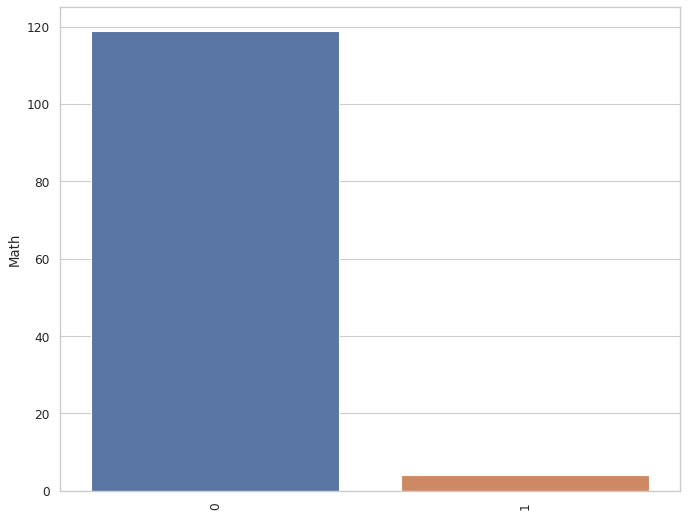

Graph for Master: Total = 2


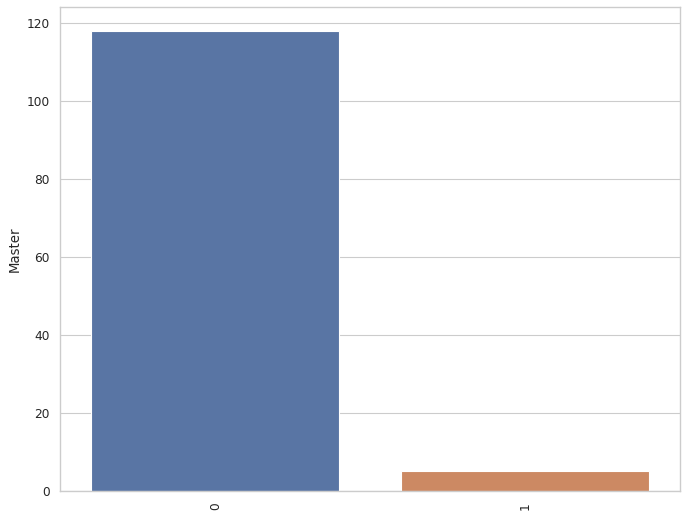

Graph for AWS: Total = 2


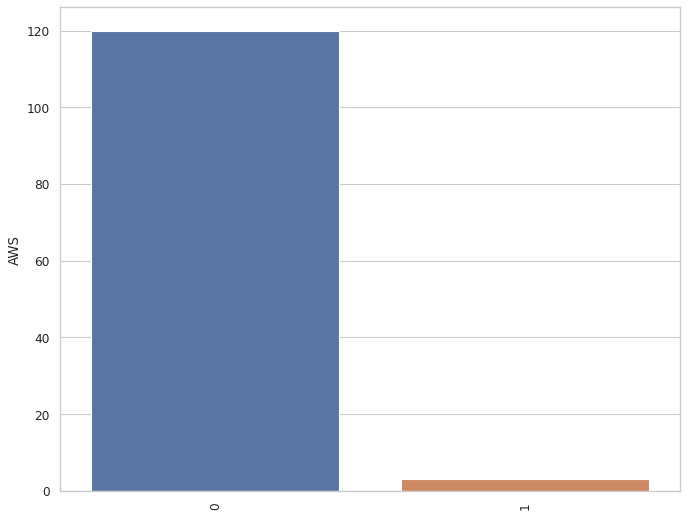

Graph for Seniority: Total = 3


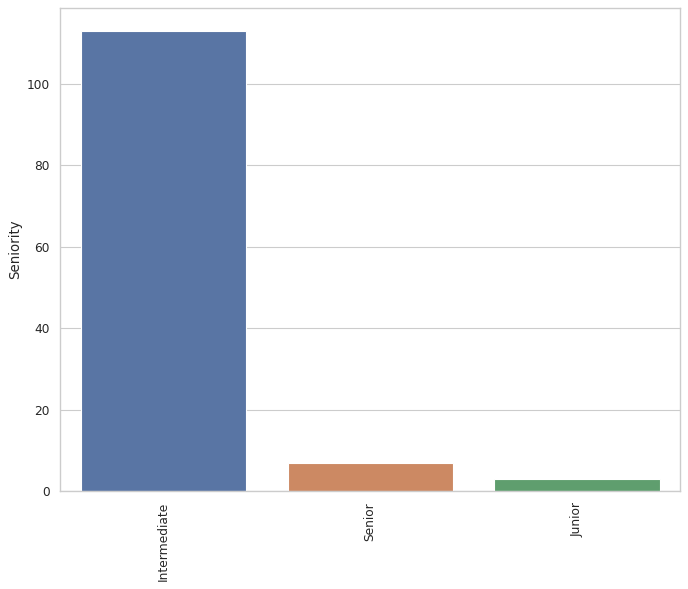

Graph for Type_position: Total = 2


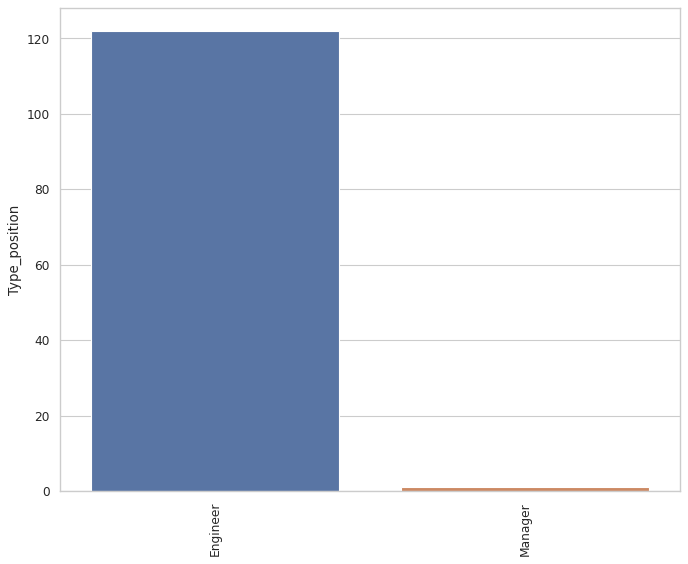

Graph for Freelance: Total = 2


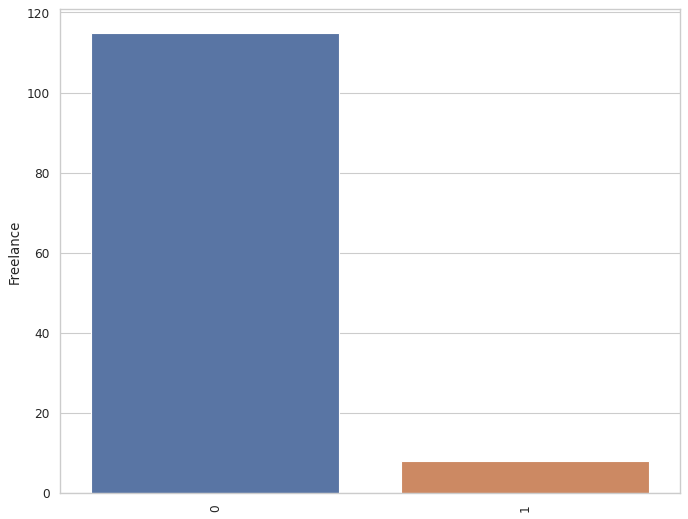

Graph for avg salary: Total = 13


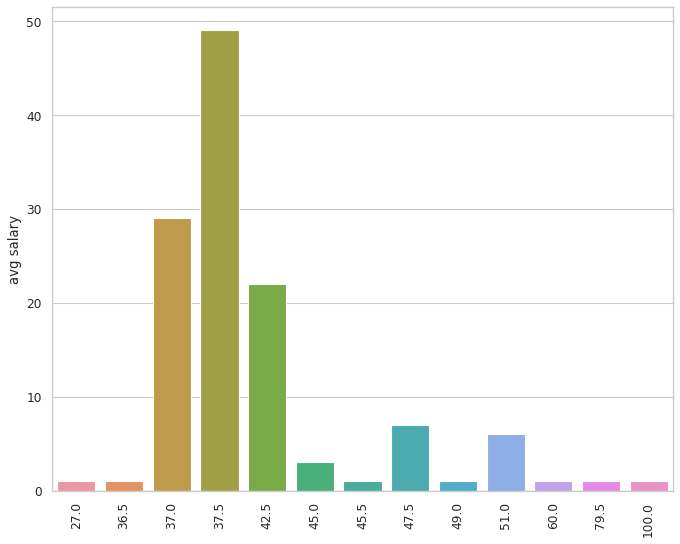

In [91]:

for i in df_cat.columns:
    figure(figsize=(10, 8), dpi=80)
    sns.set_theme(style="whitegrid")
    df_cat_num = df_cat[i].value_counts()
    print('Graph for %s: Total = %d' % (i, len(df_cat_num)))
    ax = sns.barplot(x=df_cat_num.index, y=df_cat_num)
    ax.tick_params(axis='x', rotation=90)
    plt.show(ax)

In [100]:
cat_list = ['Location', 'Company Name', 'Founded', 'Type of ownership', 'Industry', 'Sector', 'Revenue', 
            'hourly', 'Employer Provided', 'Python', 'R', 'SQL', 'Machine Learning', 'Big Data',
       'Statistique', 'Math', 'Master', 'AWS', 'Seniority',
       'Type_position', 'Freelance', 'avg salary']
pd.pivot_table(df, index=['Company Name', 'Seniority', 'Job_sim', 'Type_position'], values='avg salary').sort_values(by='avg salary')

,,,,avg salary
Company Name,Seniority,Job_sim,Type_position,
CNRS\n,Intermediate,Data Scientist,Engineer,27.000000
umlaut AG\n,Intermediate,Data Scientist,Engineer,36.750000
Stuart\n,Intermediate,Data Scientist,Engineer,37.000000
Enedis\n,Intermediate,Data Scientist,Engineer,37.000000
TotalEnergies\n,Junior,Data Scientist,Engineer,37.000000
Solutec\n,Intermediate,Data Scientist,Engineer,37.000000
Extia\n,Intermediate,Data Scientist,Engineer,37.000000
Bayer\n,Intermediate,Data Analyst,Engineer,37.000000
Firmenich\n,Intermediate,Data Scientist,Engineer,37.000000


In [101]:
pd.pivot_table(df, index=['Location', 'Seniority', 'Job_sim', 'Type_position'], values='avg salary').sort_values(by='avg salary')

,,,,avg salary
Location,Seniority,Job_sim,Type_position,
Vannes,Intermediate,Data Scientist,Engineer,27.000000
Peyrehorade,Intermediate,Data Analyst,Engineer,37.000000
Paris,Junior,Data Scientist,Engineer,37.000000
Boulogne-Billancourt,Intermediate,Data Scientist,Engineer,37.000000
Lyon,Intermediate,Data Scientist,Engineer,37.000000
Strasbourg,Intermediate,Data Scientist,Engineer,37.250000
Agen,Junior,Data Scientist,Engineer,37.500000
Pau,Intermediate,Data Scientist,Engineer,37.500000
Thiais,Senior,Data Scientist,Engineer,37.500000


In [112]:
for i in df_cat.drop('avg salary', axis=1).columns:
    print('\nFeature: %s' %i)
    print(pd.pivot_table(df, index=i, values='avg salary').sort_values(by='avg salary', ascending=False))


Feature: Location
                      avg salary
Location                        
Saint-Maur            100.000000
Guyancourt             48.500000
Montrouge              45.375000
Saint-Cloud            45.000000
Avignon                44.250000
Rungis                 44.200000
Clamart                44.000000
Saint-Denis            43.166667
Île-de-France          42.500000
Ivry                   42.500000
Villeneuve-d'Ascq      42.250000
Nanterre               41.583333
Montpellier            40.750000
Télétravail            40.500000
Paris                  40.275862
Palaiseau              40.000000
Levallois-Perret       40.000000
Blagnac                39.833333
Honfleur               39.750000
Marseille              39.166667
France                 39.083333
La Villette            39.000000
Toulouse               38.687500
Vitry                  37.500000
Anteuil                37.500000
Thiais                 37.500000
Courbevoie             37.500000
Clermont-Ferrand       3

In [114]:
pd.pivot_table(df, index='Revenue', values='avg salary', columns='Python')

Python,0,1
Revenue,,
-1,39.722222,40.388889
Entre 1 et 2 milliards de dollars US,39.000000,NaN
Entre 1 et 5 millions de dollars US,40.000000,NaN
Entre 10 et 25 millions de dollars US,48.500000,NaN
Entre 100 et 500 millions de dollars US,37.400000,NaN
Entre 2 et 5 milliards de dollars US,38.625000,NaN
Entre 25 et 50 millions de dollars US,39.571429,NaN
Entre 5 et 10 milliards de dollars US,40.642857,NaN
Entre 50 et 100 millions de dollars US,32.250000,NaN
